In [227]:
#https://gist.github.com/lindacmsheard/c6df1b511f09a3a5939280bd51ebe6b9
import sys
print(sys.version)
print(sys.executable)

3.6.2 |Anaconda, Inc.| (default, Oct  5 2017, 07:59:26) 
[GCC 7.2.0]
/anaconda/envs/experiment_env/bin/python


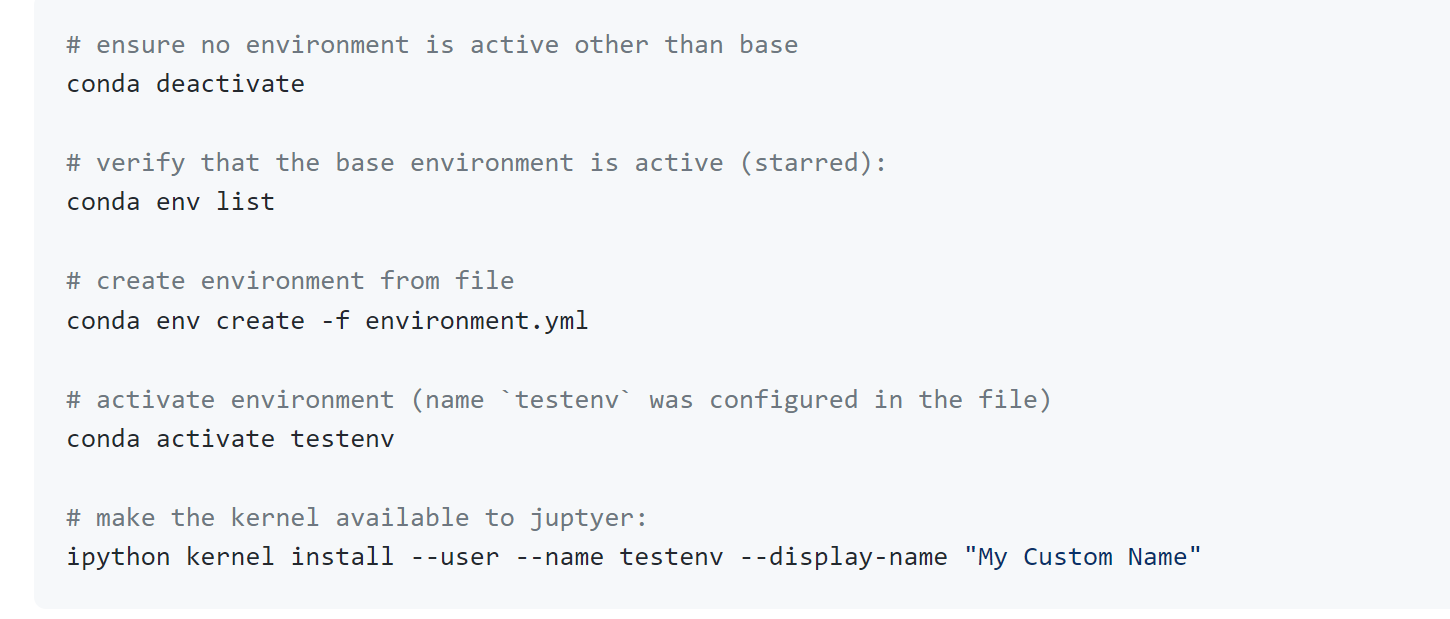

In [228]:
from IPython.display import Image

Image(filename="./image/create_custom_conda_environment.PNG")

In [229]:
import azureml.core
from azureml.core import Workspace
import pandas as pd

# Load the workspace from the saved config file
ws = Workspace.from_config()
print('Ready to use Azure ML {} to work with {}'.format(azureml.core.VERSION, ws.name))

Ready to use Azure ML 1.38.0 to work with mm-hackathon-prep


In [230]:
df1 = pd.read_csv('./Data/Train1.csv')
df2 = pd.read_csv('./Data/Train2.csv')
print(df1.shape)
print(df2.shape)

(917, 8)
(917, 8)


In [231]:
df1.columns

Index(['passenger_id', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest', 'survived'],
      dtype='object')

In [232]:
df2.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket'],
      dtype='object')

In [233]:

df = df1.merge(df2, on = 'passenger_id', how = 'inner')

In [234]:
df.columns

Index(['passenger_id', 'fare', 'cabin', 'embarked', 'boat', 'body',
       'home.dest', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket'],
      dtype='object')

In [235]:
print(df.shape)

cols = df.columns
for x in cols:
    print(x)

(917, 15)
passenger_id
fare
cabin
embarked
boat
body
home.dest
survived
pclass
name
sex
age
sibsp
parch
ticket


In [236]:
## Understanding dataset
# columns
# sibsp = # of siblings/spouses on board
# parch of parents/children on board

## View Data

In [237]:
df.head(5)

,passenger_id,fare,cabin,embarked,boat,body,home.dest,survived,pclass,name,sex,age,sibsp,parch,ticket
0,501,53.1000,E8,S,5,NaN,"New York, NY / Ithaca, NY",1.0,1.0,"Chambers, Mr. Norman Campbell",male,27.0,1.0,0.0,113806
1,588,57.0000,B20,S,3,NaN,"Calgary, AB",1.0,1.0,"Dick, Mr. Albert Adrian",male,31.0,1.0,0.0,17474
2,402,46.9000,NaN,S,NaN,NaN,"Wiltshire, England Niagara Falls, NY",0.0,3.0,"Goodwin, Master. William Frederick",male,11.0,5.0,2.0,CA 2144
3,1193,30.6958,A7,C,NaN,NaN,"St James, Long Island, NY",0.0,1.0,"Smith, Mr. James Clinch",male,56.0,0.0,0.0,17764
4,686,89.1042,C92,C,5,NaN,"Paris, France / New York, NY",1.0,1.0,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1.0,0.0,17453


## View what columns are missing data

In [238]:
df.isnull().sum()

passenger_id      0
fare              1
cabin           717
embarked          3
boat            573
body            831
home.dest       391
survived          1
pclass            1
name              1
sex               1
age             175
sibsp             1
parch             1
ticket            1
dtype: int64

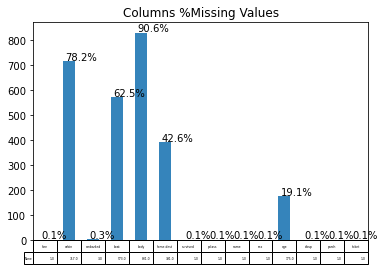

In [239]:
columns_missing = df.isna().sum().where(lambda x : x > 0).dropna()

ax = columns_missing \
.plot(kind='bar', alpha=0.9, title='Columns %Missing Values', table=True)
ax.xaxis.set_visible(False) # hide x axis labels

for x in ax.patches:
    ax.text(x.get_x()+.1, x.get_height()+5, \
            str(round((x.get_height()/df.shape[0])*100, 1))+'%')

## Feature Engineering

Based on the cart above, we know we need to address the missing values without loosing the valuable information included in the columns.

- age
- fare
- cabin: get location on boat out of the cabin information
- embarked
- boat
- body
- home.dest

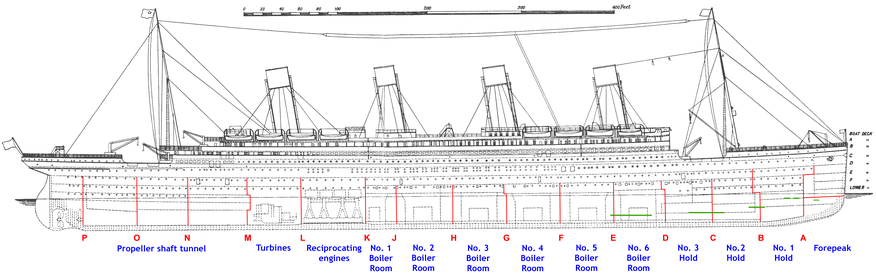

In [240]:
from IPython.display import Image

Image(filename="./image/image.png")

In [241]:
df['cabin'].unique()

array(['E8', 'B20', nan, 'A7', 'C92', 'C47', 'E101', 'C22 C26', 'E10',
       'D46', 'B57 B59 B63 B66', 'F G63', 'C23 C25 C27', 'B28', 'A11',
       'A34', 'F G73', 'D10 D12', 'C101', 'A10', 'B80', 'E17', 'E52',
       'B22', 'C82', 'D38', 'B3', 'F4', 'B51 B53 B55', 'C85', 'B73',
       'F33', 'E77', 'B30', 'C70', 'C95', 'C52', 'D6', 'C83', 'A9', 'C54',
       'B36', 'C45', 'C55 C57', 'B5', 'A23', 'E50', 'B52 B54 B56', 'E24',
       'D49', 'C132', 'C31', 'F38', 'D21', 'B96 B98', 'C2', 'D33', 'A36',
       'C126', 'F E69', 'B19', 'D34', 'C105', 'D48', 'E68', 'C104',
       'C125', 'D45', 'C106', 'B41', 'E67', 'D36', 'D15', 'C103', 'B4',
       'E40', 'D37', 'D19', 'E45', 'E121', 'C89', 'D9', 'C68', 'A29',
       'C32', 'D17', 'E58', 'E44', 'G6', 'B86', 'C130', 'E60', 'D22',
       'D7', 'A21', 'C49', 'C124', 'D26', 'F2', 'C116', 'E49', 'B37',
       'A26', 'C118', 'D20', 'B45', 'C28', 'C7', 'A16', 'D50', 'D35',
       'C86', 'E33', 'B50', 'B58 B60', 'B61', 'E34', 'B101', 'A19', 'B94',
 

In [242]:
df['loc']= df['cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'X')

<AxesSubplot:xlabel='loc'>

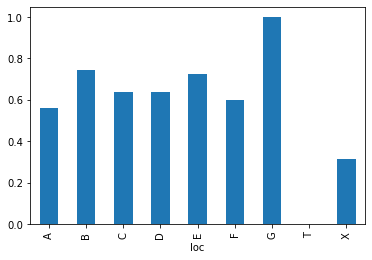

In [243]:
df[['loc', 'survived']].groupby('loc')['survived'].mean().plot(kind= 'bar')

In [244]:
df.drop(['cabin', 'ticket', 'passenger_id'], axis=1, inplace=True)

In [245]:
df.columns

Index(['fare', 'embarked', 'boat', 'body', 'home.dest', 'survived', 'pclass',
       'name', 'sex', 'age', 'sibsp', 'parch', 'loc'],
      dtype='object')

In [246]:
print(df['age'].median())

display(df.groupby(['pclass', 'sex'])['age'].count())

display(df.groupby(['pclass', 'sex'])['age'].median())

28.0


pclass  sex   
1.0     female     89
        male      104
2.0     female     79
        male      120
3.0     female    105
        male      245
Name: age, dtype: int64

pclass  sex   
1.0     female    36.0
        male      41.0
2.0     female    27.0
        male      29.5
3.0     female    22.0
        male      25.0
Name: age, dtype: float64

In [247]:
df['age'] = df.groupby(['pclass', 'sex'])['age'].apply(lambda x: x.fillna(x.median()))
df.isnull().sum()

fare           1
embarked       3
boat         573
body         831
home.dest    391
survived       1
pclass         1
name           1
sex            1
age            1
sibsp          1
parch          1
loc            0
dtype: int64

## Feature Engineering
- Still need to handle fare, embarked, boat, body, home.dest

<AxesSubplot:xlabel='pclass'>

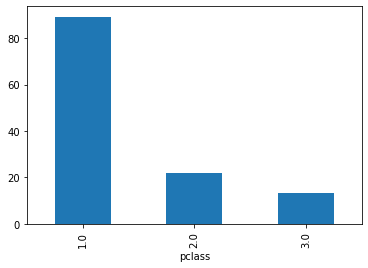

In [248]:
df[['fare', 'pclass']].groupby('pclass')['fare'].mean().plot(kind= 'bar')

In [249]:
pd.crosstab(df['pclass'], df['survived'])

survived,0.0,1.0
pclass,,
1.0,79,139
2.0,123,87
3.0,357,131


Text(0, 0.5, 'survived')

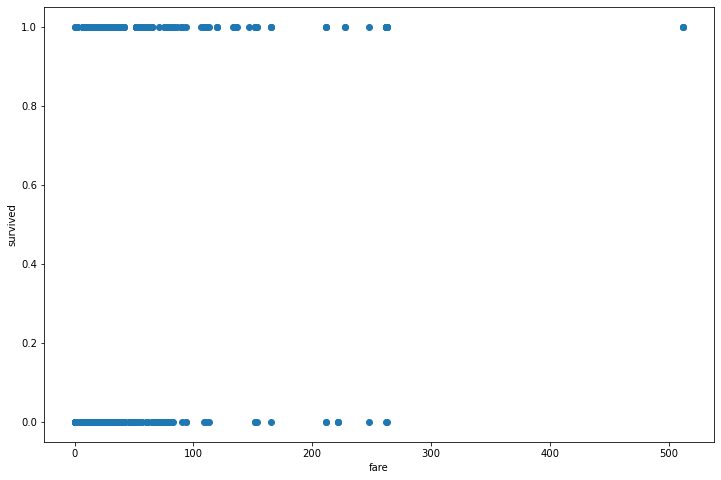

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = (12, 8))
plt.scatter(df['fare'], df['survived'])
plt.xlabel('fare')
plt.ylabel('survived')

## Review Correlations

In [251]:
corr = df.corr()
corr

,fare,body,survived,pclass,age,sibsp,parch
fare,1.000000,-0.045887,0.246531,-0.549800,0.177358,0.171148,0.254853
body,-0.045887,1.000000,NaN,-0.058733,0.077094,-0.056729,-0.016593
survived,0.246531,NaN,1.000000,-0.306503,-0.019269,-0.034565,0.103096
pclass,-0.549800,-0.058733,-0.306503,1.000000,-0.431233,0.058441,-0.005120
age,0.177358,0.077094,-0.019269,-0.431233,1.000000,-0.218775,-0.135073
sibsp,0.171148,-0.056729,-0.034565,0.058441,-0.218775,1.000000,0.427448
parch,0.254853,-0.016593,0.103096,-0.005120,-0.135073,0.427448,1.000000


<AxesSubplot:>

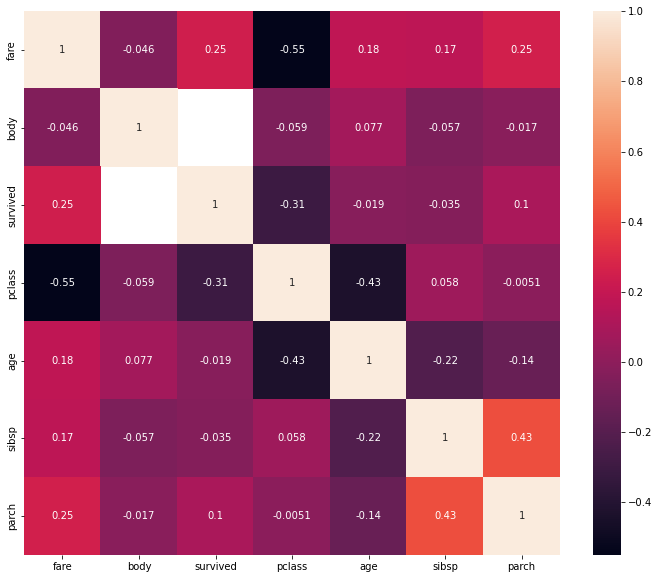

In [252]:
fig, ax = plt.subplots(figsize = (12, 10))
sns.heatmap(corr, annot = True)

## Feature Engineering
- High correlation between pclass and fare - we will remove the fare

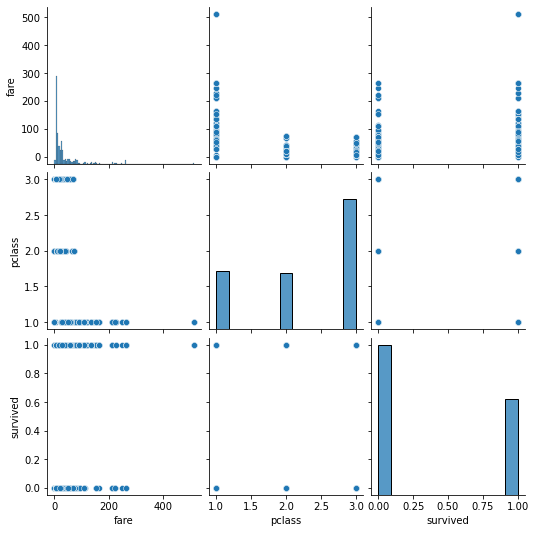

In [253]:
dftemp = df[['fare','pclass', 'survived']]
sns.pairplot(dftemp)

## Drop fare - lower correlation factor to survived than pclass

In [254]:
df.drop(['fare'], axis=1, inplace=True)

In [255]:
df.isnull().sum()

embarked       3
boat         573
body         831
home.dest    391
survived       1
pclass         1
name           1
sex            1
age            1
sibsp          1
parch          1
loc            0
dtype: int64

In [256]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [257]:
print(df['embarked'].value_counts())

S    648
C    183
Q     83
Name: embarked, dtype: int64


In [258]:
df['embarked'] = df['embarked'].fillna('S')
df = df.dropna(subset=['pclass'])

In [259]:
df.isnull().sum()

embarked       0
boat         572
body         830
home.dest    390
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
loc            0
dtype: int64

In [260]:
df.drop(['boat', 'body'], axis=1, inplace=True)

In [261]:
df.isnull().sum()

embarked       0
home.dest    390
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
loc            0
dtype: int64

In [262]:
df['home.dest'].unique()

array(['New York, NY / Ithaca, NY', 'Calgary, AB',
       'Wiltshire, England Niagara Falls, NY',
       'St James, Long Island, NY', 'Paris, France / New York, NY',
       'Bryn Mawr, PA, USA', nan, 'Syria', 'New York, NY',
       'Harrow-on-the-Hill, Middlesex', 'Paris, France', 'Portugal',
       'Bournemouth, England', 'Paris', 'England / Hartford, CT',
       'Barcelona, Spain / Havana, Cuba', 'Stockholm, Sweden',
       'Jacksonville, FL', 'Montreal, PQ / Chesterville, ON',
       'Syria Fredericksburg, VA', 'Effington Rut, SD',
       'Russia New York, NY', 'Cornwall / Akron, OH',
       'East Providence, RI', 'East Orange, NJ',
       'Denmark Hill, Surrey / Chicago',
       'Haverford, PA / Cooperstown, NY', 'Sweden Worcester, MA',
       'Winnipeg, MB', 'Cincinatti, OH', 'Milford, NH',
       'Devonport, England', 'San Francisco, CA',
       'Guernsey / Wilmington, DE', 'New Forest, England',
       'Cornwall / Hancock, MI', 'Bayside, Queens, NY',
       'Somerset / Bernardsv

In [263]:
## Maybe useful for model, but will require a lot of clean-up given the low correlation score, let's drop the column
df.drop(['home.dest'], axis=1, inplace=True)

In [264]:
df.dtypes

embarked     object
survived    float64
pclass      float64
name         object
sex          object
age         float64
sibsp       float64
parch       float64
loc          object
dtype: object

In [265]:
df.head(5)

,embarked,survived,pclass,name,sex,age,sibsp,parch,loc
0,S,1.0,1.0,"Chambers, Mr. Norman Campbell",male,27.0,1.0,0.0,E
1,S,1.0,1.0,"Dick, Mr. Albert Adrian",male,31.0,1.0,0.0,B
2,S,0.0,3.0,"Goodwin, Master. William Frederick",male,11.0,5.0,2.0,X
3,C,0.0,1.0,"Smith, Mr. James Clinch",male,56.0,0.0,0.0,A
4,C,1.0,1.0,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,36.0,1.0,0.0,C


In [266]:
df['hasFamily'] = (df['sibsp'] > 0) | (df['parch'] > 0)
df.drop(['sibsp', 'parch', 'name'], axis=1, inplace=True)

In [267]:
df.dtypes

embarked      object
survived     float64
pclass       float64
sex           object
age          float64
loc           object
hasFamily       bool
dtype: object

In [268]:
import os
script_folder = os.path.join(os.getcwd(), "train")
print(script_folder)
os.makedirs(script_folder, exist_ok=True)
df = df.sample(frac=1).reset_index(drop=True)
df.to_csv('./train/data.csv', index = False)

/mnt/batch/tasks/shared/LS_root/mounts/clusters/memasanz4/code/Users/memasanz/Internal-hack-prep/train


In [269]:
df.columns

Index(['embarked', 'survived', 'pclass', 'sex', 'age', 'loc', 'hasFamily'], dtype='object')

In [270]:
## Convert categorical value to ordered integer values
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
df['sex'] = label_encoding.fit_transform(df['sex'].astype(str))
print(label_encoding.classes_)
df.head(5)

['female' 'male']


,embarked,survived,pclass,sex,age,loc,hasFamily
0,S,0.0,3.0,1,28.0,X,False
1,S,0.0,3.0,0,21.0,X,True
2,S,1.0,1.0,0,27.0,B,True
3,C,1.0,2.0,0,3.0,X,True
4,S,1.0,1.0,0,18.0,E,True


In [271]:
## categorical values with no order cna be converted using 1-hot encording
df = pd.get_dummies(df, columns = ['embarked', 'loc'])
df.head(5)

,survived,pclass,sex,age,hasFamily,embarked_C,embarked_Q,embarked_S,loc_A,loc_B,loc_C,loc_D,loc_E,loc_F,loc_G,loc_T,loc_X
0,0.0,3.0,1,28.0,False,0,0,1,0,0,0,0,0,0,0,0,1
1,0.0,3.0,0,21.0,True,0,0,1,0,0,0,0,0,0,0,0,1
2,1.0,1.0,0,27.0,True,0,0,1,0,1,0,0,0,0,0,0,0
3,1.0,2.0,0,3.0,True,1,0,0,0,0,0,0,0,0,0,0,1
4,1.0,1.0,0,18.0,True,0,0,1,0,0,0,0,1,0,0,0,0


In [272]:
from sklearn.model_selection import train_test_split
X = df.drop('survived', axis = 1)
Y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [273]:
X_train.shape, y_train.shape

((732, 16), (732,))

In [274]:
from sklearn.linear_model import LogisticRegression
#regularization - penality of complex models
lg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(X_train, y_train)

In [275]:
X_test.dtypes
X_test.to_csv('./Data/checkMe.csv')
X_train.to_csv('./Data/checkMe2.csv')

In [276]:
X_test.head(170)

,pclass,sex,age,hasFamily,embarked_C,embarked_Q,embarked_S,loc_A,loc_B,loc_C,loc_D,loc_E,loc_F,loc_G,loc_T,loc_X
252,3.0,1,25.0,False,1,0,0,0,0,0,0,0,0,0,0,1
817,3.0,1,35.0,False,0,0,1,0,0,0,0,0,0,0,0,1
144,1.0,1,57.0,True,0,0,1,0,0,0,0,0,0,0,0,1
750,3.0,1,23.5,False,1,0,0,0,0,0,0,0,0,0,0,1
145,3.0,1,25.0,False,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,3.0,1,25.0,False,0,0,1,0,0,0,0,0,0,0,0,1
703,3.0,1,38.0,False,0,0,1,0,0,0,0,0,0,0,0,1
424,2.0,0,24.0,True,0,0,1,0,0,0,0,0,0,0,0,1
460,3.0,0,22.0,False,0,0,1,0,0,0,0,0,0,0,0,1


In [277]:
y_pred = lg.predict(X_test)

In [278]:
results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
results.head(10)

,y_test,y_pred
252,0.0,0.0
817,0.0,0.0
144,0.0,0.0
750,0.0,0.0
145,0.0,0.0
372,0.0,0.0
55,0.0,1.0
912,0.0,0.0
97,1.0,1.0
14,1.0,0.0


In [279]:
cross_tab = pd.crosstab(results.y_pred, results.y_test)
cross_tab

y_test,0.0,1.0
y_pred,,
0.0,92,18
1.0,21,53


In [280]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(acc)
print(prec)
print(recall)

0.7880434782608695
0.7162162162162162
0.7464788732394366


In [281]:
## Building Repeatable model

Starting experiment: titanic_hackathon
Index(['pclass', 'sex', 'age', 'embarked', 'loc', 'hasFamily', 'survived'], dtype='object')
Index(['pclass', 'sex', 'age', 'embarked', 'loc', 'hasFamily'], dtype='object')
AUC: 0.8197087658592849
Accuracy: 0.7588235294117647


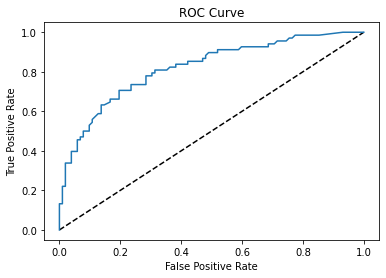

Model trained and registered.


In [282]:
# Separate features and labels
import os
import sys
import argparse
import joblib
import pandas as pd
import numpy as np

from azureml.core import Run, Dataset, Workspace, Experiment

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import roc_auc_score,roc_curve

# Calculate model performance metrics
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt


def buildpreprocessorpipeline(X_raw):
    categorical_features = X_raw.select_dtypes(include=['object', 'bool']).columns
    numeric_features = X_raw.select_dtypes(include=['float','int64']).columns


    categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value="missing")),
                                              ('onehotencoder', OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore'))])
    
    numeric_transformer1 = Pipeline(steps=[('scaler1', SimpleImputer(missing_values=np.nan, strategy = 'mean'))])
    #numeric_transformer2 = Pipeline(steps=[('scaler2', StandardScaler(with_mean=True))])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('numeric1', numeric_transformer1, numeric_features),
            ('categorical', categorical_transformer, categorical_features)
        ], remainder="drop")
    
    return preprocessor

def model_train(LABEL, df, run):  
    y_raw = df[LABEL]
    X_raw = df.drop([LABEL], axis=1)
    print(X_raw.columns)
     # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=0)
    
    #use Logistic Regression estimator from scikit learn
    lg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
    preprocessor = buildpreprocessorpipeline(X_train)
    
    #estimator instance
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', lg)])

    model = clf.fit(X_train, y_train)
    
    
    # calculate AUC
    y_scores = model.predict_proba(X_test)
    auc = roc_auc_score(y_test,y_scores[:,1])
    print('AUC: ' + str(auc))
    run.log('AUC', np.float(auc))

    
    # calculate test accuracy
    y_hat = model.predict(X_test)
    acc = np.average(y_hat == y_test)
    print('Accuracy:', acc)
    run.log('Accuracy', np.float(acc))

    # plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
    fig = plt.figure(figsize=(6, 4))
    # Plot the diagonal 50% line
    plt.plot([0, 1], [0, 1], 'k--')
    # Plot the FPR and TPR achieved by our model
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    run.log_image(name = "ROC", plot = fig)
    plt.show()

    # plot confusion matrix
    # Generate confusion matrix
    cmatrix = confusion_matrix(y_test, y_hat)
    cmatrix_json = {
        "schema_type": "confusion_matrix",
           "schema_version": "v1",
           "data": {
               "class_labels": ["0", "1"],
               "matrix": [
                   [int(x) for x in cmatrix[0]],
                   [int(x) for x in cmatrix[1]]
               ]
           }
    }
    
    run.log_confusion_matrix('ConfusionMatrix_Test', cmatrix_json)

    return model
    # Save the trained model
    
    
def main():
    # Create an Azure ML experiment in your workspace
    experiment = Experiment(workspace=ws, name= 'titanic_hackathon')
    run = experiment.start_logging()
    print("Starting experiment:", experiment.name)

    #df = pd.read_csv('./train/data.csv')
    df1 = pd.read_csv('./Data/titanic_train1.csv')
    df2 = pd.read_csv('./Data/titanic_train2.csv')
    df = df1.merge(df2, on = 'passenger_id', how = 'inner')
    df['loc']= df['cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'X')
    df['hasFamily'] = (df['sibsp'] > 0) | (df['parch'] > 0)
    cols_to_keep = ['pclass','sex','age','embarked','loc','hasFamily', 'survived']
    df = df[cols_to_keep]
    print(df.columns)


    model = model_train('survived', df, run)
    
    os.makedirs('outputs', exist_ok=True)
    # note file saved in the outputs folder is automatically uploaded into experiment record

    model_file = 'outputs/titanic_model.pkl'
    joblib.dump(value=model, filename=model_file)

    
    run.complete()
    
    # Register the model
    run.register_model(model_path=model_file, model_name= 'titanic-model',
                   tags={'Model Type':'Logistic Regresssion'})

    
    print('Model trained and registered.')

if __name__ == "__main__":
    main()

## Review results and confirm model is usable

In [283]:
from azureml.core.model import Model
import os

script_folder = os.path.join(os.getcwd(), "model_download")
print(script_folder)
os.makedirs(script_folder, exist_ok=True)

model = Model(workspace=ws, name="titanic-model")
model.download(target_dir=script_folder, exist_ok=True)

/mnt/batch/tasks/shared/LS_root/mounts/clusters/memasanz4/code/Users/memasanz/Internal-hack-prep/model_download


'/mnt/batch/tasks/shared/LS_root/mounts/clusters/memasanz4/code/Users/memasanz/Internal-hack-prep/model_download/titanic_model.pkl'

In [288]:
df = pd.read_csv('./train/data.csv')

columsn_to_keep = ['pclass', 'sex', 'age', 'embarked', 'loc', 'hasFamily']
X = df[columsn_to_keep]
model_path = script_folder + '/titanic_model.pkl'
model = joblib.load(model_path)

In [289]:
X.columns
#'pclass', 'sex', 'age', 'embarked', 'loc', 'hasFamily'

Index(['pclass', 'sex', 'age', 'embarked', 'loc', 'hasFamily'], dtype='object')

In [290]:
y_pred = model.predict(X)
y_test = df['survived'].to_list()

In [291]:
results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
results

,y_test,y_pred
0,0.0,0
1,0.0,1
2,1.0,1
3,1.0,1
4,1.0,1
...,...,...
911,1.0,0
912,0.0,0
913,0.0,0
914,0.0,0


In [292]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(acc)
print(prec)
print(recall)

0.7849344978165939
0.7352941176470589
0.7002801120448179


In [293]:
df.head(20)

,embarked,survived,pclass,sex,age,loc,hasFamily
0,S,0.0,3.0,male,28.0,X,False
1,S,0.0,3.0,female,21.0,X,True
2,S,1.0,1.0,female,27.0,B,True
3,C,1.0,2.0,female,3.0,X,True
4,S,1.0,1.0,female,18.0,E,True
5,C,0.0,3.0,male,25.0,X,False
6,S,0.0,2.0,male,30.0,X,False
7,S,1.0,3.0,female,23.0,X,False
8,S,0.0,3.0,female,23.0,X,False
9,C,1.0,1.0,female,24.0,C,False
